<h1>ResNet model<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [79]:
import torch
from torchvision import models
from torchvision import transforms
from PIL import Image

In [7]:
alexnet = models.AlexNet

In [9]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /Users/alexfil/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|█████████████████████████████████████████| 171M/171M [12:02<00:00, 247kB/s]


In [10]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
])

In [67]:
img = Image.open('/Users/alexfil/Desktop/pytorch/i.webp')

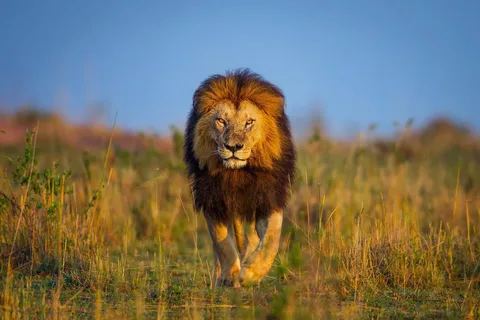

In [68]:
img

In [69]:
img_t = preprocess(img)

In [71]:
batch_t = torch.unsqueeze(img_t, 0)

In [72]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [73]:
out = resnet(batch_t)

In [74]:
out

tensor([[ 8.4017e-01, -4.9399e+00, -1.6339e+00, -1.1297e+00, -3.8988e+00,
         -1.1208e+00, -2.3609e+00,  1.1891e+00, -6.9740e-02,  3.9917e+00,
         -2.0191e+00,  2.4887e-01, -1.2968e+00, -3.2149e+00, -2.6026e+00,
         -4.0067e+00, -2.5455e+00, -1.5308e+00, -1.8378e+00, -2.1161e+00,
         -3.5761e+00,  2.9865e+00,  2.4499e+00,  3.0883e+00,  2.0646e+00,
          1.1736e+00,  4.1839e-01, -7.6756e-02,  1.1744e-01, -1.2702e+00,
          4.8781e-02, -3.2210e-01,  1.2205e+00, -2.0385e+00, -3.1936e+00,
         -1.0085e+00, -1.9504e+00, -2.1574e+00, -2.5654e-01, -2.8311e-01,
         -3.6618e+00,  5.4332e-01, -5.0438e-01, -3.7707e-01,  5.6997e-01,
         -8.2186e-01, -3.5501e+00, -4.5831e-02, -1.8590e+00,  2.5659e+00,
         -1.1214e+00, -1.8159e-01,  2.6312e+00,  1.7972e+00, -1.6330e+00,
         -8.1961e-01, -1.0776e+00,  1.7716e+00, -7.7620e-02,  2.1245e+00,
          2.5444e+00,  3.9907e-01,  3.1996e+00,  7.9570e-01,  2.2977e-02,
          6.5407e-01,  2.4204e+00,  1.

In [75]:
with open('/Users/alexfil/Desktop/pytorch/imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [76]:
_, index = torch.max(out, 1)

In [77]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
labels[index[0]], percentage[index[0]].item()

('lion', 99.92655181884766)

In [78]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('lion', 99.92655181884766),
 ('Tibetan mastiff', 0.011775637976825237),
 ('Newfoundland', 0.0076118833385407925),
 ('macaque', 0.006965360138565302),
 ('chow', 0.006016558967530727)]